# Cybersecurity Intrusion Data Analysis

## Welcome! 👋

Hi! In this notebook, we're going to explore some real cybersecurity data. We'll look at what makes a session normal and what indicates an attack. Don't worry if you're new to data analysis - I'll explain everything step by step!

Let's start by loading our data and seeing what we're working with.

## Step 1: Loading the Data

First, let's import the libraries we need and load the cybersecurity dataset. Think of libraries as toolboxes - each one has different tools we can use!

In [ ]:
# Import libraries needed for data analysis
import numpy as np  # For numerical operations
import pandas as pd  # For working with data tables (DataFrames)
import matplotlib.pyplot as plt  # For creating charts and visualizations
import seaborn as sns  # For better-looking statistical plots
import os  # For file path operations

# Configure seaborn style for better-looking charts
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


In [ ]:
# Load the CSV file into a pandas DataFrame
# pd.read_csv() reads comma/tab-separated data from a file
# sep='\t' tells pandas the data is separated by tabs, not commas
script_dir = os.path.dirname(os.path.abspath('__file__'))
csv_file = "Cybersecurity_Intrusion_Data.csv"
df = pd.read_csv(csv_file, sep='\t')

# Display basic info about the dataset
print(f"✓ Dataset loaded!")
print(f"\nWe have {len(df)} records and {len(df.columns)} columns")

✓ Dataset loaded!

We have 99 records and 11 columns


## Step 2: Let's Meet Our Data

What columns do we have? What do they mean? Let's take a quick look!

In [ ]:
# df.head() shows the first 5 rows of data
# This helps us understand the structure and see sample values
print("First 5 rows of our data:")
print(df.head())

First 5 rows of our data:
  session_id  network_packet_size protocol_type  login_attempts  \
0  SID_00001                  599           TCP               4   
1  SID_00002                  472           TCP               3   
2  SID_00003                  629           TCP               3   
3  SID_00004                  804           UDP               4   
4  SID_00005                  453           TCP               5   

   session_duration encryption_used  ip_reputation_score  failed_logins  \
0        492.983263             DES             0.606818              1   
1       1557.996461             DES             0.301569              0   
2         75.044262             DES             0.739164              2   
3        601.248835             DES             0.123267              0   
4        532.540888             AES             0.054874              1   

  browser_type  unusual_time_access  attack_detected  
0         Edge                    0                1  
1      Fir

In [ ]:
# df.columns shows all column names
# df[col].dtype shows the data type (int, float, string, etc)
# This helps us understand what kind of data each column contains
print("\n📊 Column Information:")
print("="*50)
for i, col in enumerate(df.columns, 1):
    data_type = df[col].dtype
    print(f"{i}. {col:30} -> {data_type}")


📊 Column Information:
1. session_id                     -> str
2. network_packet_size            -> int64
3. protocol_type                  -> str
4. login_attempts                 -> int64
5. session_duration               -> float64
6. encryption_used                -> str
7. ip_reputation_score            -> float64
8. failed_logins                  -> int64
9. browser_type                   -> str
10. unusual_time_access            -> int64
11. attack_detected                -> int64


In [ ]:
# df.isnull().sum() counts missing/empty values in each column
# Missing data can cause problems in analysis, so we need to check for it
print("\n⚠️ Missing Values:")
print("="*50)
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✓ Great! No missing values!")
else:
    print(missing[missing > 0])


⚠️ Missing Values:
encryption_used    22
dtype: int64


## Step 3: The Main Question - Are There Attacks?

Let's see how many sessions have attacks and how many are normal.

In [ ]:
# value_counts() counts how many times each value appears in 'attack_detected' column
# This shows us how many sessions are normal (0) vs attacks (1)
# We extract and store these counts in variables for later use
attack_counts = df['attack_detected'].value_counts().sort_index()
normal = attack_counts[0]
attacks = attack_counts[1]

print("🔍 Attack Statistics:")
print("="*50)
print(f"Normal sessions: {normal} ({normal/len(df)*100:.1f}%)")
print(f"Detected attacks: {attacks} ({attacks/len(df)*100:.1f}%)")
print(f"Total sessions: {len(df)}")

🔍 Attack Statistics:
Normal sessions: 47 (47.5%)
Detected attacks: 52 (52.5%)
Total sessions: 99


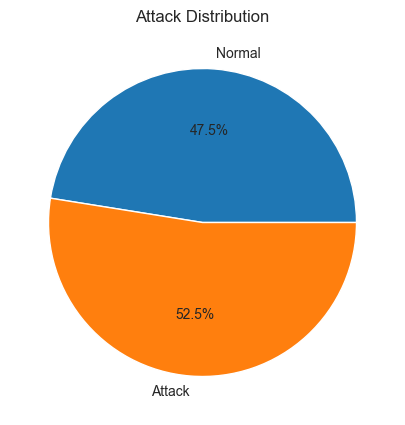

In [12]:
# Create a pie chart to visualize the proportion of attacks vs normal sessions
# pie() is better than bar for showing percentages/proportions of a whole
fig, ax = plt.subplots(figsize=(8, 5))
ax.pie([normal, attacks], labels=['Normal', 'Attack'], autopct='%1.1f%%')
plt.title('Attack Distribution')
plt.show()

# Why this visualization? It makes it easy to see what percentage of data is attacks

## Step 4: What Protocols Are Used?

TCP and UDP are two different ways data travels on networks. Let's see which one is used more and if one is more prone to attacks.

In [ ]:
# value_counts() counts how many sessions use each protocol (TCP or UDP)
# This shows us which network protocol is more commonly used in our data
protocol_counts = df['protocol_type'].value_counts()

print("🌐 Protocol Types:")
print("="*50)
for protocol, count in protocol_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{protocol}: {count} sessions ({percentage:.1f}%)")

🌐 Protocol Types:
TCP: 75 sessions (75.8%)
UDP: 19 sessions (19.2%)
ICMP: 5 sessions (5.1%)


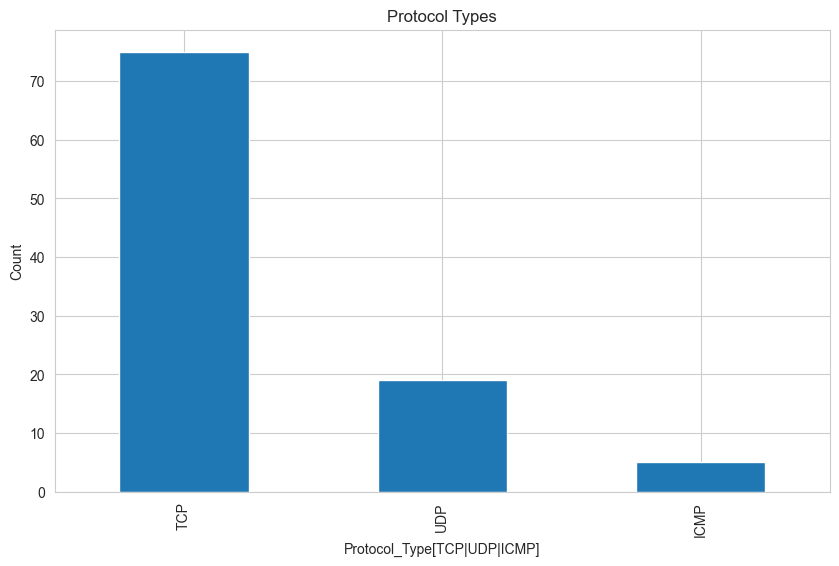

In [14]:
# plot(kind='bar') creates a bar chart from a pandas Series
# Bar charts are good for comparing counts across different categories
# This shows which protocol has more sessions at a glance
protocol_counts.plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Protocol_Type[TCP|UDP|ICMP]')
plt.title('Protocol Types')
plt.show()

## Step 5: Login Attempts and Failed Logins

More failed login attempts might mean someone is trying to break in! Let's check if attackers have more failed logins.

In [15]:
# df['login_attempts'].mean() calculates the average value
# df['login_attempts'].min/max() finds the minimum and maximum values
# df['login_attempts'].mode() finds the most common value
# These statistics tell us typical login behavior in the dataset
print("👤 Login Attempts Statistics:")
print("="*50)
print(f"Average attempts: {df['login_attempts'].mean():.1f}")
print(f"Minimum: {df['login_attempts'].min()}")
print(f"Maximum: {df['login_attempts'].max()}")
print(f"Most common: {df['login_attempts'].mode()[0]} attempts")

print("\n❌ Failed Logins Statistics:")
print("="*50)
print(f"Average failed: {df['failed_logins'].mean():.1f}")
print(f"Minimum: {df['failed_logins'].min()}")
print(f"Maximum: {df['failed_logins'].max()}")
print(f"Most common: {df['failed_logins'].mode()[0]} failures")

👤 Login Attempts Statistics:
Average attempts: 4.4
Minimum: 1
Maximum: 10
Most common: 5 attempts

❌ Failed Logins Statistics:
Average failed: 1.5
Minimum: 0
Maximum: 4
Most common: 2 failures


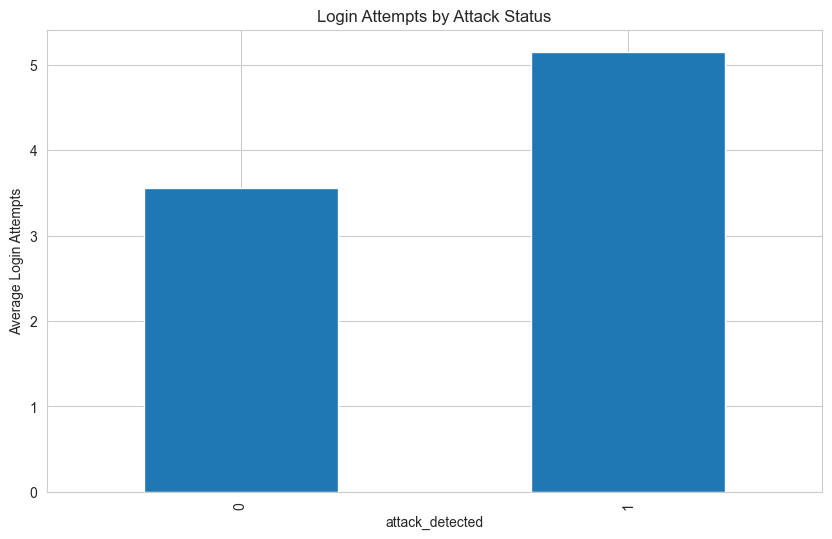

In [16]:
# groupby('attack_detected') splits data into two groups: normal (0) and attack (1)
# .mean() calculates average for each group
# Comparing averages between groups shows if one group has significantly different values
# This helps identify if attackers behave differently than normal users
df.groupby('attack_detected')['login_attempts'].mean().plot(kind='bar')
plt.ylabel('Average Login Attempts')
plt.title('Login Attempts by Attack Status')
plt.show()

# Why this? If attacks have higher average attempts, it's a warning sign

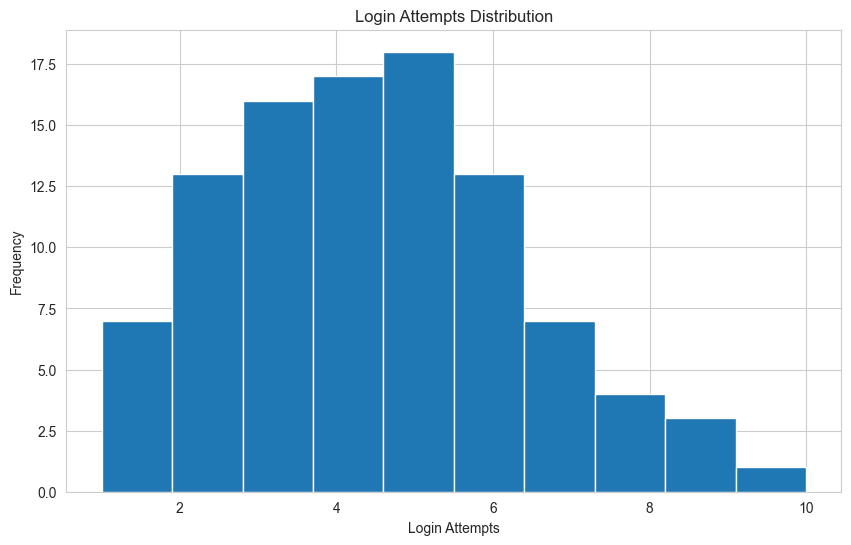

In [17]:
# Distribution of login attempts
df['login_attempts'].hist(bins=10)
plt.xlabel('Login Attempts')
plt.ylabel('Frequency')
plt.title('Login Attempts Distribution')
plt.show()

## Step 6: Network Packet Size and Session Duration

How big are the data packets? How long do sessions last? Let's check if attack sessions look different!

In [18]:
# Calculate statistics for network packet size and session duration
# .mean() gives average, .min()/.max() give range
# These help understand typical network behavior in normal sessions
print("📦 Network Packet Size:")
print("="*50)
print(f"Average: {df['network_packet_size'].mean():.0f} bytes")
print(f"Smallest: {df['network_packet_size'].min()} bytes")
print(f"Largest: {df['network_packet_size'].max()} bytes")

print("\n⏱️ Session Duration:")
print("="*50)
print(f"Average: {df['session_duration'].mean():.0f} seconds")
print(f"Shortest: {df['session_duration'].min():.0f} seconds")
print(f"Longest: {df['session_duration'].max():.0f} seconds")

📦 Network Packet Size:
Average: 480 bytes
Smallest: 64 bytes
Largest: 870 bytes

⏱️ Session Duration:
Average: 798 seconds
Shortest: 13 seconds
Longest: 3325 seconds


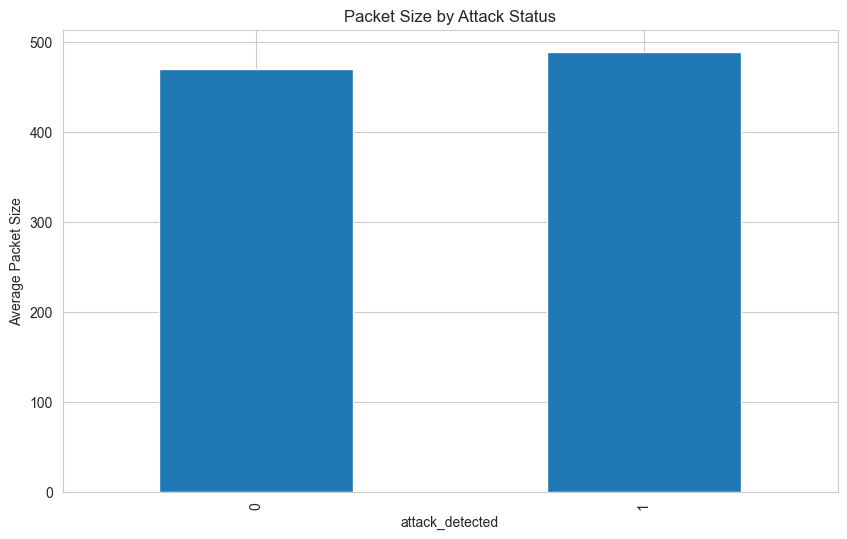

In [27]:
# groupby() + .mean() compares average packet size between normal and attack sessions
# If attacks have different packet sizes, it could be a detection pattern
df.groupby('attack_detected')['network_packet_size'].mean().plot(kind='bar')
plt.ylabel('Average Packet Size')
plt.title('Packet Size by Attack Status')
plt.show()

# Why this? Attackers might send unusually large or small packets

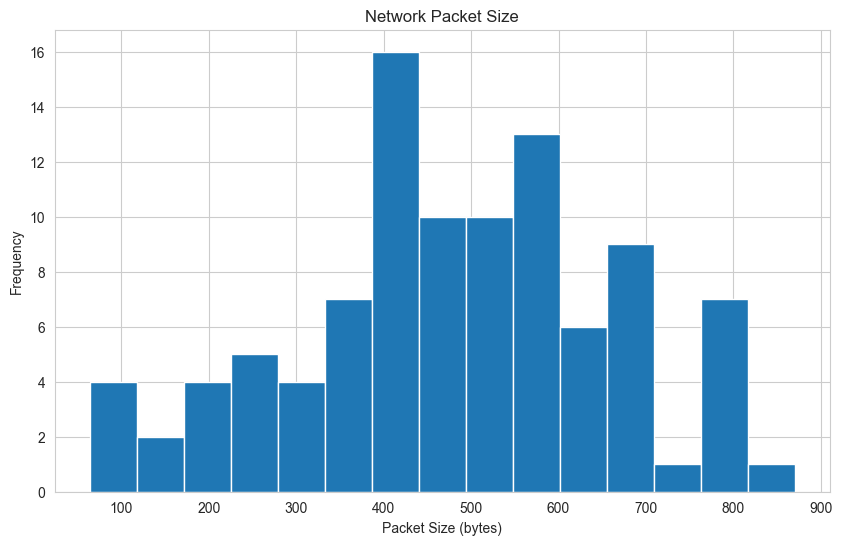

In [28]:
# Packet size distribution
df['network_packet_size'].hist(bins=15)
plt.xlabel('Packet Size (bytes)')
plt.ylabel('Frequency')
plt.title('Network Packet Size')
plt.show()

## Step 7: Encryption Types

There are different ways to encrypt data. DES and AES are two common methods. Let's see which is used more and which is safer!

In [34]:
# value_counts() shows how many sessions use each encryption method (DES, AES, or None)
# Different encryption methods have different security levels
# This shows what encryption is most commonly used in the dataset
encryption_counts = df['encryption_used'].value_counts()

print("🔐 Encryption Types Used:")
for encryption, count in encryption_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{encryption}: {count} sessions ({percentage:.1f}%)")

🔐 Encryption Types Used:
AES: 43 sessions (43.4%)
DES: 34 sessions (34.3%)


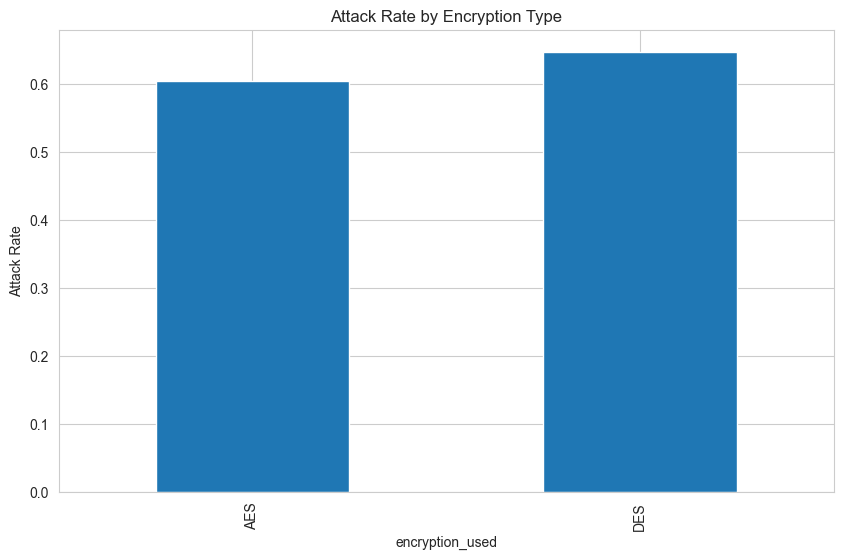

In [35]:
# groupby() + .mean() calculates attack rate (percentage) for each encryption type
# If one encryption type has more attacks, it might be weaker or less commonly used by attackers
# This helps identify which encryption provides better protection
df.groupby('encryption_used')['attack_detected'].mean().plot(kind='bar')
plt.ylabel('Attack Rate')
plt.title('Attack Rate by Encryption Type')
plt.show()

# Why this? Different encryption might correlate with different attack rates

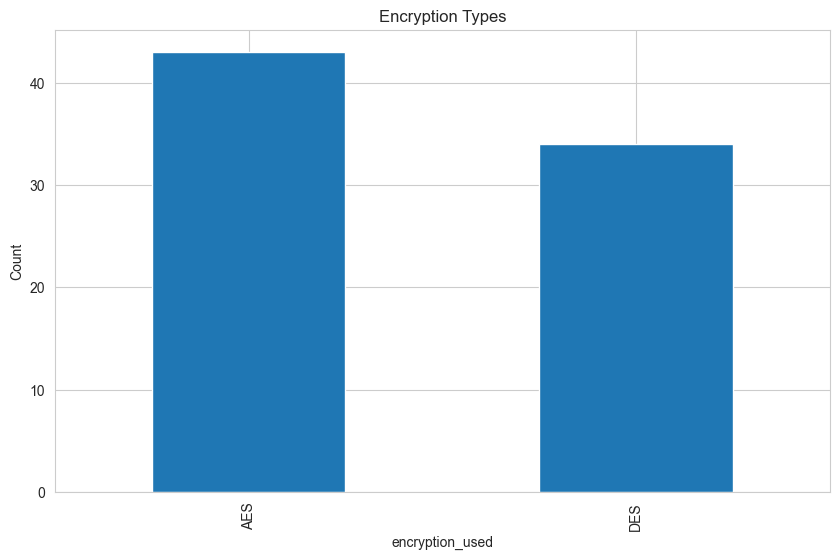

In [36]:
# Encryption type count
encryption_counts.plot(kind='bar')
plt.ylabel('Count')
plt.title('Encryption Types')
plt.show()

## Step 8: IP Reputation Score

An IP's reputation score tells us how trustworthy it is (0 = not trusted, 1 = very trusted). Let's see if attackers come from bad IPs!

In [37]:
# Calculate statistics for IP reputation scores
# Score ranges from 0 (completely untrusted) to 1 (completely trusted)
# Higher average score means IPs in this dataset are generally trustworthy
print("🌐 IP Reputation Score:")
print(f"Average score: {df['ip_reputation_score'].mean():.3f}")
print(f"Lowest: {df['ip_reputation_score'].min():.3f}")
print(f"Highest: {df['ip_reputation_score'].max():.3f}")
print(f"(Score: 0 = untrusted, 1 = very trusted)")

🌐 IP Reputation Score:
Average score: 0.354
Lowest: 0.035
Highest: 0.871
(Score: 0 = untrusted, 1 = very trusted)


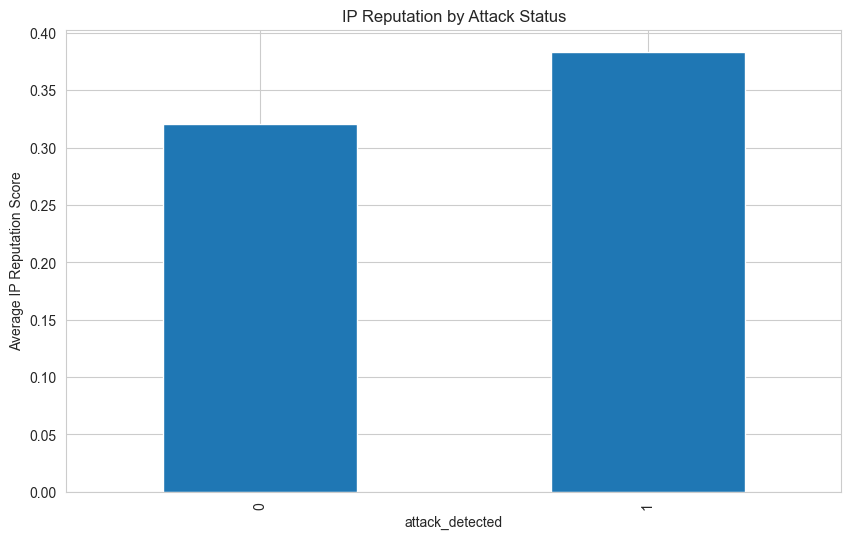

In [38]:
# groupby() + .mean() compares average IP reputation between normal and attack sessions
# If attackers have lower reputation scores, it's a useful detection pattern
# Lower reputation score = IP previously flagged as suspicious
df.groupby('attack_detected')['ip_reputation_score'].mean().plot(kind='bar')
plt.ylabel('Average IP Reputation Score')
plt.title('IP Reputation by Attack Status')
plt.show()

# Why this? Attackers might come from IPs with bad reputation scores

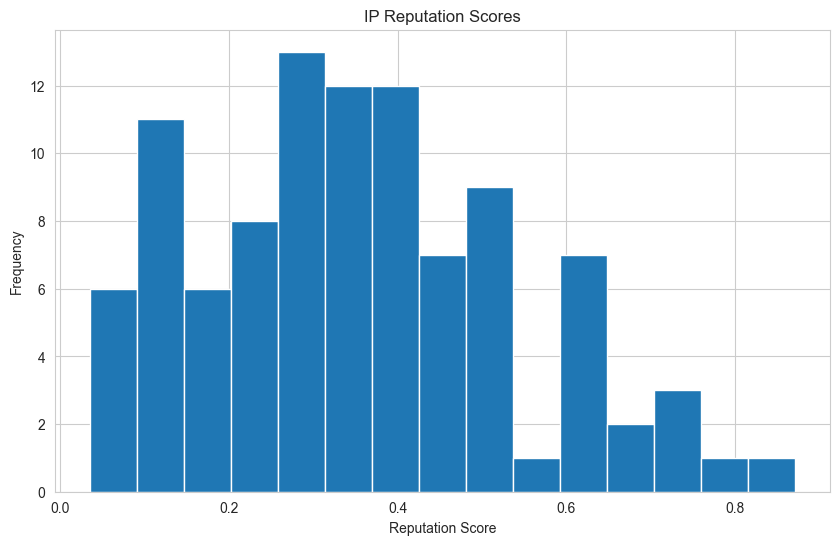

In [39]:
# IP reputation score distribution
df['ip_reputation_score'].hist(bins=15)
plt.xlabel('Reputation Score')
plt.ylabel('Frequency')
plt.title('IP Reputation Scores')
plt.show()

## Step 9: Unusual Time Access

Do people log in at weird times during attacks? Let's check if unusual access times indicate attacks!

In [40]:
# value_counts() counts sessions at normal vs unusual times
# .get(0, 0) safely gets the count (returns 0 if not found)
# Unusual access times might indicate attackers working outside business hours
unusual_counts = df['unusual_time_access'].value_counts().sort_index()
normal_time = unusual_counts.get(0, 0)
unusual_time = unusual_counts.get(1, 0)

print("🕐 Access Time Pattern:")
print(f"Normal hours: {normal_time} sessions ({normal_time/len(df)*100:.1f}%)")
print(f"Unusual hours: {unusual_time} sessions ({unusual_time/len(df)*100:.1f}%)")

# Calculate attack rates for each time category
normal_time_attack = df[df['unusual_time_access'] == 0]['attack_detected'].mean() * 100
unusual_time_attack = df[df['unusual_time_access'] == 1]['attack_detected'].mean() * 100

print("\n🚨 Attack Rate by Access Time:")
print(f"Normal hours: {normal_time_attack:.1f}% attack rate")
print(f"Unusual hours: {unusual_time_attack:.1f}% attack rate")

🕐 Access Time Pattern:
Normal hours: 83 sessions (83.8%)
Unusual hours: 16 sessions (16.2%)

🚨 Attack Rate by Access Time:
Normal hours: 56.6% attack rate
Unusual hours: 31.2% attack rate


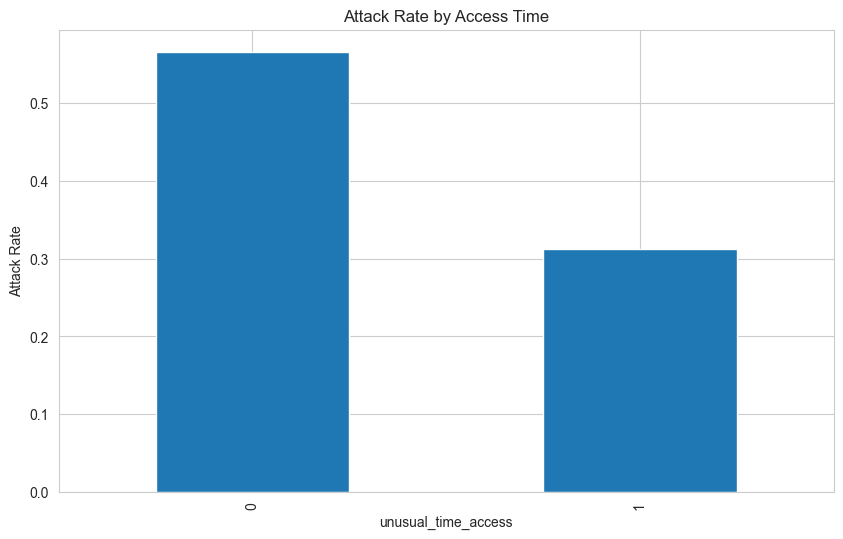

In [41]:
# groupby() + .mean() calculates attack rate for each access time
# Comparing shows if unusual hours have more attacks
# This could indicate automated attacks happening outside business hours
df.groupby('unusual_time_access')['attack_detected'].mean().plot(kind='bar')
plt.ylabel('Attack Rate')
plt.title('Attack Rate by Access Time')
plt.show()

# Why this? Attacks at unusual times could indicate bot activity or external threats

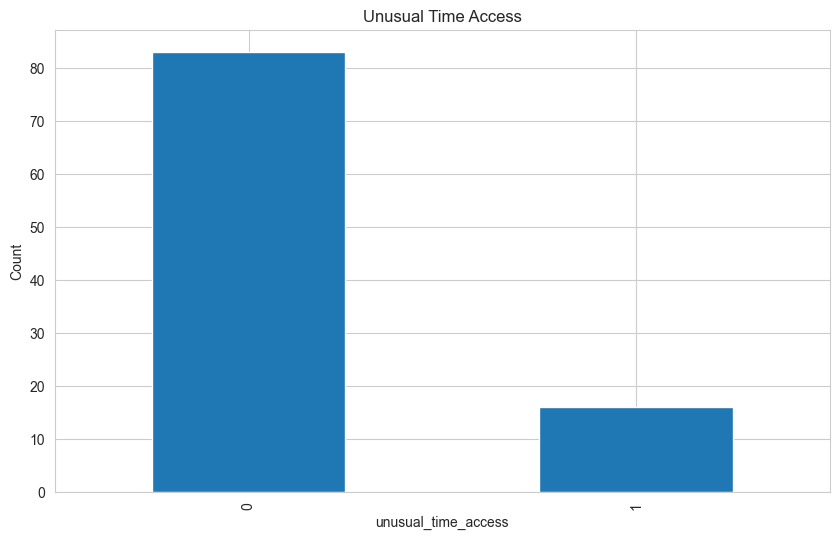

In [42]:
# Unusual time access count
unusual_counts.plot(kind='bar')
plt.ylabel('Count')
plt.title('Unusual Time Access')
plt.show()

## Step 10: Browser Types

Which browsers are people using? Do attacks happen more with certain browsers?

In [43]:
# value_counts() shows which browsers are used in the dataset
# Different browsers might have different security vulnerabilities
# This helps understand what browsers are most commonly targeted or used
browser_counts = df['browser_type'].value_counts()

print("🌐 Browser Types:")
for browser, count in browser_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{browser}: {count} sessions ({percentage:.1f}%)")

🌐 Browser Types:
Chrome: 51 sessions (51.5%)
Firefox: 23 sessions (23.2%)
Edge: 16 sessions (16.2%)
Unknown: 5 sessions (5.1%)
Safari: 4 sessions (4.0%)


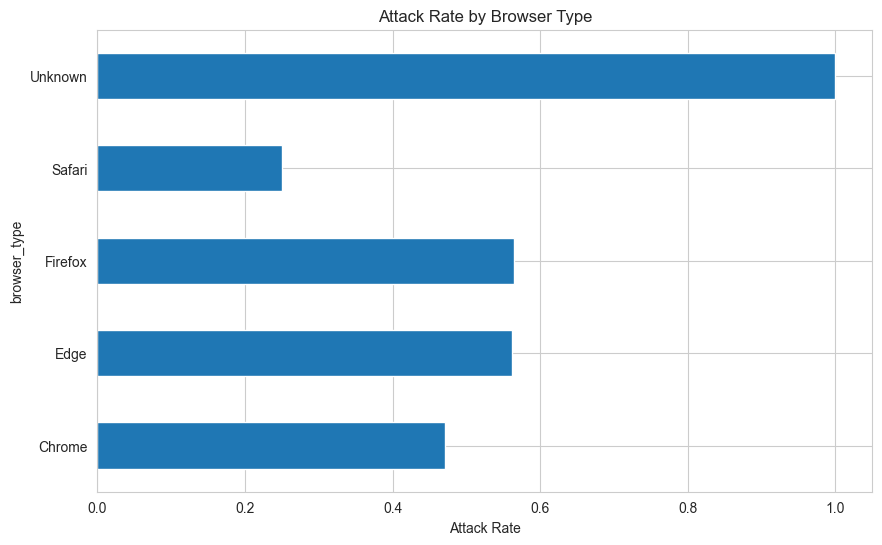

In [46]:
# groupby() + .mean() calculates attack rate for each browser type
# If one browser has significantly more attacks, it might be more vulnerable
# This helps prioritize browser security improvements
df.groupby('browser_type')['attack_detected'].mean().plot(kind='barh')
plt.xlabel('Attack Rate')
plt.title('Attack Rate by Browser Type')
plt.show()

# Why this? Identifying vulnerable browsers helps prioritize security updates

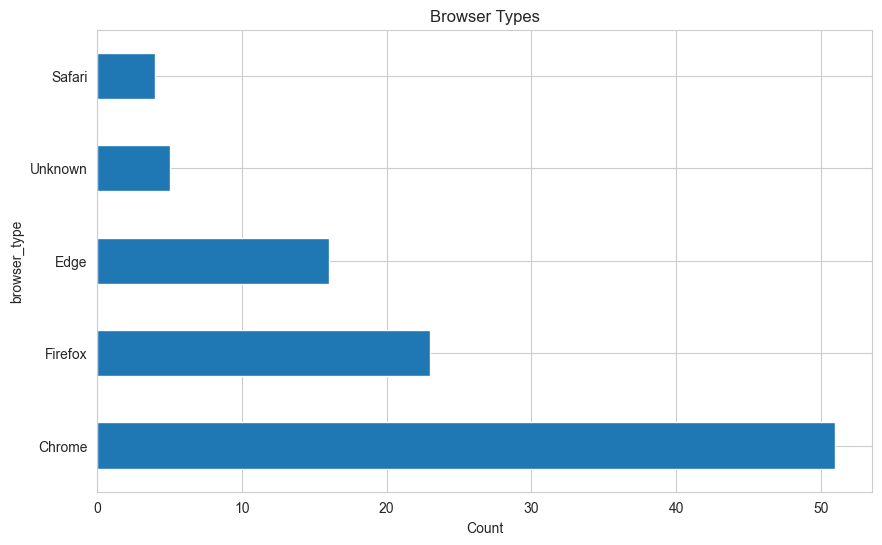

In [47]:
# Browser type count
browser_counts.plot(kind='barh')
plt.xlabel('Count')
plt.title('Browser Types')
plt.show()

## Step 11: Finding Relationships Between Variables

Do some variables relate to attacks more than others? Let's create a correlation matrix to see which variables are most important for predicting attacks!

In [48]:
# select_dtypes(include=[np.number]) selects only numeric columns (int, float)
# This excludes text columns that can't be correlated with each other
# .corr() calculates correlation - how much two variables move together
# Correlation ranges from -1 to +1 (0 means no relationship)
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numeric_cols].corr()

print("🔗 How Do Variables Relate to Attacks?")
attack_corr = correlation['attack_detected'].sort_values(ascending=False)
print(attack_corr)

print("\n💡 Interpretation:")
print("   • Values close to +1: Strong positive relationship with attacks")
print("   • Values close to -1: Strong negative relationship with attacks")
print("   • Values close to 0: No relationship with attacks")

🔗 How Do Variables Relate to Attacks?
attack_detected        1.000000
login_attempts         0.386397
failed_logins          0.301556
ip_reputation_score    0.167051
network_packet_size    0.054674
session_duration      -0.085914
unusual_time_access   -0.187060
Name: attack_detected, dtype: float64

💡 Interpretation:
   • Values close to +1: Strong positive relationship with attacks
   • Values close to -1: Strong negative relationship with attacks
   • Values close to 0: No relationship with attacks


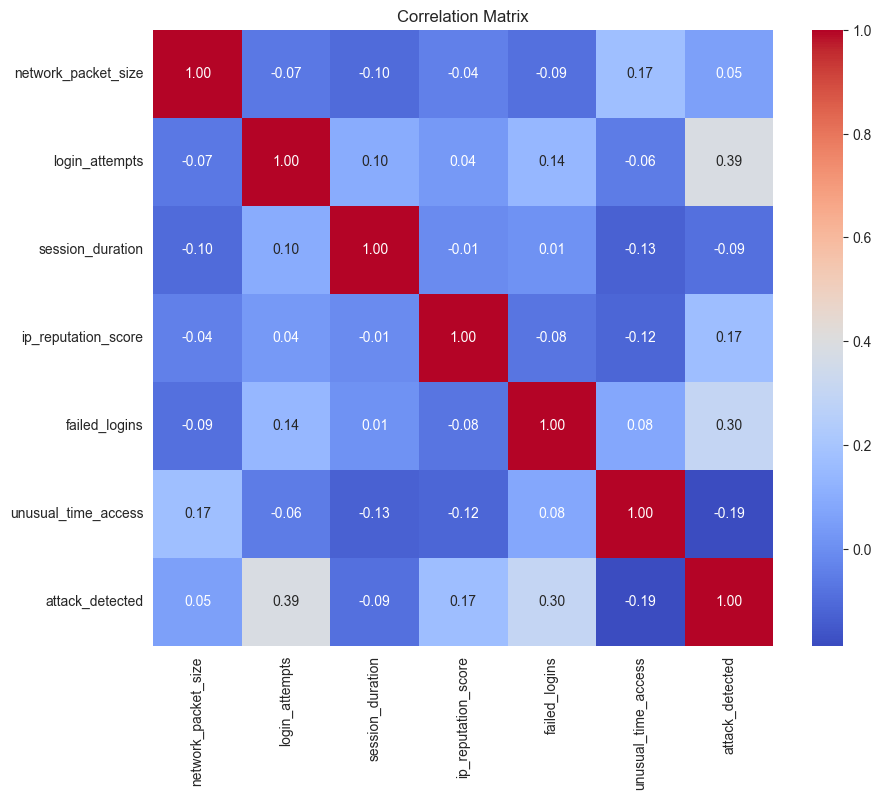

In [49]:
# sns.heatmap() creates a color-coded grid showing correlations
# Red colors = positive correlation (variables increase together)
# Blue colors = negative correlation (one increases, other decreases)
# This makes it easy to spot which variables are related to attacks
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Why this? Visual representation makes it easier to identify important relationships

## Step 12: KEY INSIGHTS & SUMMARY

Let's summarize what we learned from the data!

In [52]:
# Final summary: collect key findings from our analysis
# Using boolean filtering (df[df['column'] > value]) to find high-risk sessions
# This helps us create actionable security insights

print("🎯 WHAT WE DISCOVERED")

# Count overall statistics
print(f"\n📊 Overall Statistics:")
print(f"  • Total sessions: {len(df)}")
print(f"  • Normal sessions: {(df['attack_detected']==0).sum()}")
print(f"  • Attack sessions: {(df['attack_detected']==1).sum()}")
print(f"  • Attack rate: {(df['attack_detected'].mean()*100):.1f}%")

# Identify high-risk indicators
# Boolean filtering creates subsets of data matching our criteria
print(f"\n🚨 High-Risk Indicators:")
high_failed = df[df['failed_logins'] >= 2]
high_attempts = df[df['login_attempts'] >= 4]
unusual_access = df[df['unusual_time_access'] == 1]

print(f"  • Sessions with 2+ failed logins:")
print(f"    {len(high_failed)} sessions ({high_failed['attack_detected'].mean()*100:.1f}% are attacks)")
print(f"  • Sessions with 4+ login attempts:")
print(f"    {len(high_attempts)} sessions ({high_attempts['attack_detected'].mean()*100:.1f}% are attacks)")
print(f"  • Sessions at unusual times:")
print(f"    {len(unusual_access)} sessions ({unusual_access['attack_detected'].mean()*100:.1f}% are attacks)")

# Protocol insights
print(f"\n🌐 Protocol Insights:")
for protocol in df['protocol_type'].unique():
    proto_data = df[df['protocol_type'] == protocol]
    attack_rate = proto_data['attack_detected'].mean() * 100
    print(f"  • {protocol}: {attack_rate:.1f}% attack rate")

🎯 WHAT WE DISCOVERED

📊 Overall Statistics:
  • Total sessions: 99
  • Normal sessions: 47
  • Attack sessions: 52
  • Attack rate: 52.5%

🚨 High-Risk Indicators:
  • Sessions with 2+ failed logins:
    50 sessions (62.0% are attacks)
  • Sessions with 4+ login attempts:
    63 sessions (65.1% are attacks)
  • Sessions at unusual times:
    16 sessions (31.2% are attacks)

🌐 Protocol Insights:
  • TCP: 49.3% attack rate
  • UDP: 63.2% attack rate
  • ICMP: 60.0% attack rate
